#  <center> A Complete Guide to Principal Component Analysis </center>

### <center> Support me with an upvote if you find it useful! 👍 </center>

## Table of Contents

<a id="toc"></a>

- [1. Introduction](#1)
    - 1.1 What is Principal Component Analysis?
    - 1.2 How does Principal Component Analysis work?
        
        
- [2. How to find the principal components?](#2)
    - 2.1 The Loading Vectors
    - 2.2 Data Preprocess for PCA
    - 2.3 The Scree Plot
    - 2.4 The Kernel Trick in PCA


- [3. Example: PCA for Portfolio Analysis](#4)
    - 3.1 Data Preprocess
    - 3.2 Scree Plot
    - 3.3 Contribution of Features
    
    
- [4. Example: PCA for Image Denoising](#4)
    - 4.1 Data Preprocess
    - 4.2 Normal PCA
    - 4.3 Kernel PCA

Have a look at these notebooks if you want to learn about:

1. **Linear Regression**: [A Complete Guide to Linear Regression](https://www.kaggle.com/code/ryanluoli2/a-complete-guide-to-linear-regression)
2. **Regularized Regression**: [A Complete Guide to Regularized Regressions](https://www.kaggle.com/code/ryanluoli2/a-complete-guide-to-regularized-regressions)
3. **Logistic Regression**: [A Complete Guide to Logistic Regression](https://www.kaggle.com/code/ryanluoli2/a-complete-guide-to-logistic-regression)
4. **Support Vector Machine**: [A Complete Guide to Support Vector Machine](https://www.kaggle.com/code/ryanluoli2/a-complete-guide-to-support-vector-machine)
5. **Decision Trees & Tree Ensembles**: [A Complete Guide to Decision Trees & Ensembles](https://www.kaggle.com/code/ryanluoli2/a-complete-guide-to-decision-trees-ensembles)
6. **Naive Bayes Classifiers**: [A Complete Guide to Decision Trees & Ensembles](https://www.kaggle.com/code/ryanluoli2/a-complete-guide-to-naive-bayes-classifiers)
7. **K-Nearest Neighbours**: [A Complete Guide to K-Nearest Neighbours](https://www.kaggle.com/code/ryanluoli2/a-complete-guide-to-k-nearest-neighbours)
8. **Clustering Methods**: [A Complete Guide to Clustering Methods](https://www.kaggle.com/code/ryanluoli2/a-complete-guide-to-clustering-methods)

<a id="1"></a>

# <center>Introduction</center>

## What is Principal Component Analysis?

**`Principal Component Analysis`** is an **unsupervised** learning technique used for exploratory data analysis, especially in **dimensionality reduction**.

Let's say you have a dataset with **200 features** (high dimensionality) and you want to **visualize** the data points. However, you find it **impossible** to plot the them due to the **high dimensionality** they have. Luckily, you can use **PCA** to **reduce the dimensionality** by generating only **2 or 3 new features** that capture most of the **variations** in the data point. Then, you can make a **2D or 3D plot** of these features to visualize the data points.

The following example demonstrates how you can visualize **3-dimensional** data points with a **2D plot** using PCA:

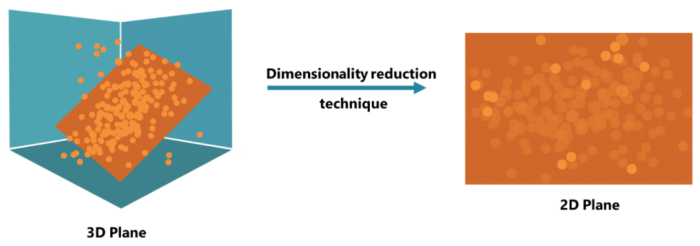

Image Source: https://medium.com/nerd-for-tech/basic-intuition-of-pca-9b2e9b8a7ca2

## How does Principal Component Analysis work?

As mentioned above, PCA achieves **dimensionality reduction** by finding the **principal components** of the data points.

The **`principal components`** are the **vectors** of **highest variance**. In other words, they are the **directions** where the data points varies the most. PCA finds these **vectors** that **explain most of the variance** observed in the data points. For example, **vector 3** in the following diagram explains most of the variance:

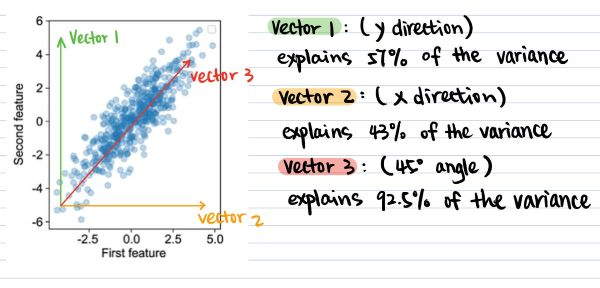

Great! Now we have found the **vector** of highest varaince. In the next step, PCA **projects** the data points onto this **vector** to obtain the corresponding **`principal component scores`**. For example, if PCA projects the data points onto **vector 1**:

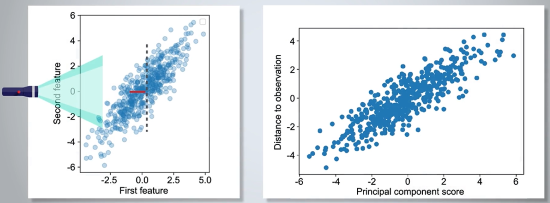

As you can see in the right diagram, the **principal component scores** obtained using **vector 1** is highly affected by the **distances** of the data points to the vector. On the other hand, such effect is **mitigated** if the data points are **projected** onto the vector that **captures most of the varaince** (vector 3):

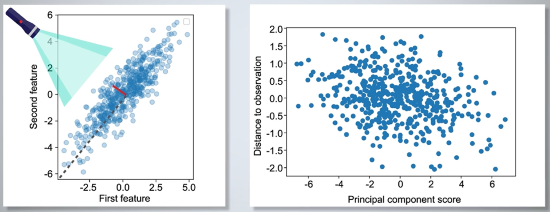

The **principal component scores** mentioned above are the **new features** PCA generated as the result of **dimensionality reduction**. By plotting these scores, you can visualize the data points in a lower dimesional plot.

If you are looking for a clear explanation of the relationship between **principal components** and **principal component scores**:
https://stats.stackexchange.com/questions/222/what-are-principal-component-scores

Now you understand how PCA works intuitively, let's dive into the mathematical theories behind.

<a id="2"></a>

# <center>How to find the principal components?</center>

## The Loading Vectors

First, let's have a look an example showing the relationship between the **feature values**, the first **principal component** and its corresponding **principal component scores**:

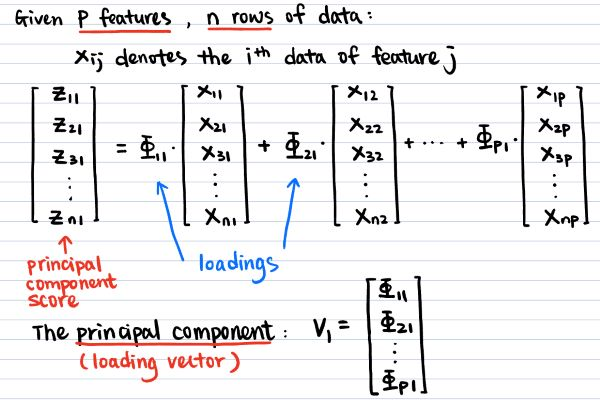

As demonstrated above, the **score matrix** is the **product** of the **feature matrix** and the **principal component vector**. This **multiplication** process is equivalent to the **projection** of the **data points** onto the **principal component vector**. The principal component vector is also known as the **loading vector**.

To find the **loading vector** that captures the **most variance** in the data points, we have to solve the following **constrained optimization problem**:

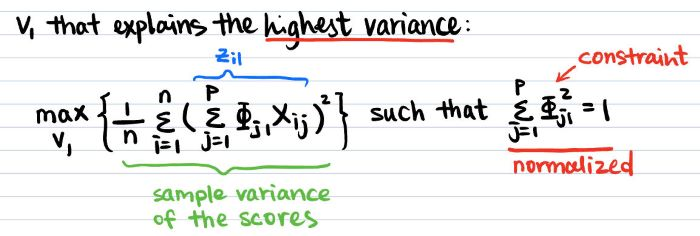

We have to **maximize** the **sample varaince** of the **principal component scores** while keeping the loading vector **normalized**. **Maximum sample varaince** of the scores ensures that the **loading vector** captures most of the variance and the **normalization constraint** avoid the **loading vector** get sent to infinity.

The **rest principal component vectors** can be calculated using the **same method** but with an **additional constraint**. For example, the second principal component vector $V_{2}$ must be **orthogonal** to the first vector $V_{1}$. The third principal component vector $V_{3}$ must be **orthogonal** to both $V_{1}$ and $V_{2}$. This is to ensure that a **new vector** does not explain the varaince that has already been captured by the **previous vectors**.

## Data Preprocess for PCA

To obtain the correct **principal components**, there is one thing that we **must do** before PCA can be used: **`mean centering`**.

To **mean centering** the data points means that for **each one of the features** we make the values have an **average of 0**. The following example demonstrates what would happen if **mean centering** is not done before PCA: the obtained **vector** is not the optimal vector

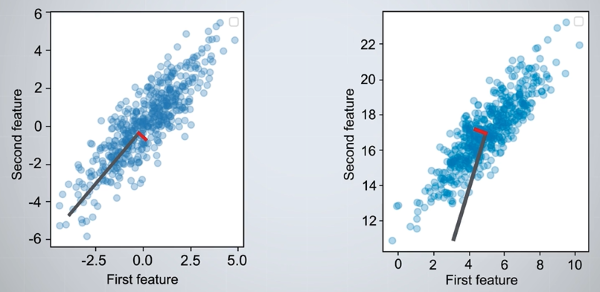

Another thing that is commonly done in data preprocessing for PCA is called **`varaible scaling`**, which is to scale the features values so that they have a **standard deviation of 1**. Otherwise PCA might consider features with **larger magnitudes** are contributing more **varaince**.

## The Scree Plot

Now you underestand how PCA finds the **principal components**, but how many of these **principal components** should we use? In other words, how do we know we have captured **enough information**?

We can find this out with a **`scree plot`**:

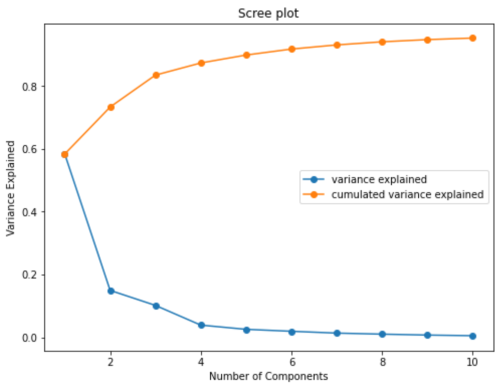

As shown above, a **scree plot** tells you how much **varinace** is explained by each **principal component**. We typically choose the **elbow point** on the scree plot as the number of components we will use. This is similar to that of choosing the **number of neighbours** in **KNN**.

## The Kernel Trick in PCA

So far, we have been talking about **finding the vectors** and **projecting** data points onto the vectors. What if the data points cannot be **linearly projected** onto the vectors we found? In other words, what if the variance cannot be simply explained by a **linear function**? For example:

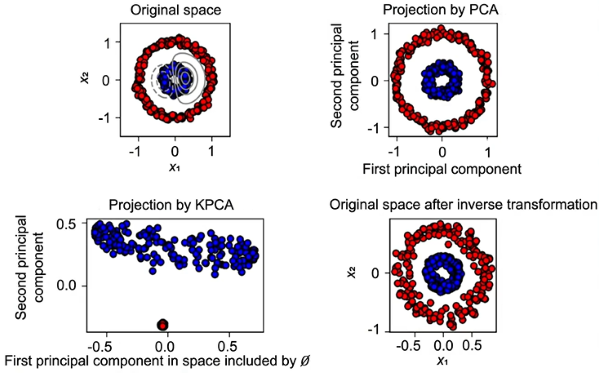

As you can see, simple PCA cannot cope with the case where data points cannot be **linearly seperated**. Luckily, we can apply the **`kernel trick`** which **transforms** the data points into **higher dimensional space** and makes them **linerly seperable**.

This is the same **kernel trick** that is oftenly used in **support vector machines**. Learn more about it here: [A Complete Guide to Support Vector Machine](https://www.kaggle.com/code/ryanluoli2/a-complete-guide-to-support-vector-machine)

<a id="3"></a>

# <center>Example: PCA for Portfolio Analysis</center>

In this example, I will show you how to find out the stocks that contribute the most variance in a portfolio using PCA.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA

### Import Data

Each feature is a stock within the porfolio.

In [2]:
df_stock = pd.read_csv("../input/stock-data/cleaned_stock_data.csv")
df_stock.head()

,AAL,AAPL,AAP,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,...,XLNX,XL,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
0,14.75,67.8542,78.90,36.25,46.89,34.41,73.31,39.12,45.70,30.22,...,37.51,28.24,88.61,42.87,31.84,27.09,65.30,75.85,24.14,33.05
1,14.46,68.5614,78.39,35.85,46.76,34.26,73.07,38.64,46.08,30.28,...,37.46,28.31,88.28,42.84,31.96,27.46,64.55,75.65,24.21,33.26
2,14.27,66.8428,78.60,35.42,46.96,34.30,73.37,38.89,46.27,30.81,...,37.58,28.41,88.46,42.87,31.84,27.95,64.75,75.44,24.49,33.74
3,14.66,66.7156,78.97,35.27,46.64,34.46,73.56,38.81,46.26,31.16,...,37.80,28.42,88.67,43.08,32.00,28.26,64.41,76.00,24.74,33.55
4,13.99,66.6556,78.84,36.57,46.77,34.70,73.13,38.61,46.54,31.40,...,38.44,28.22,88.52,42.91,32.12,28.47,63.89,76.34,24.63,33.27


### Standardize Data

In [3]:
scaler = StandardScaler()
df_stock[df_stock.columns] = scaler.fit_transform(df_stock[df_stock.columns])

### Calculate the Principal Component Scores

We find the first 10 principal components of the stock data.

In [4]:
n = 10
pca = PCA(n_components=n)
rotatedData = pca.fit_transform(df_stock)

features = []
for i in range(n):
    features.append(f'X{i}')
df_PCA = pd.DataFrame(data=rotatedData, columns=features)
df_PCA.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9
0,-28.195197,0.148662,13.579697,3.976459,2.363334,-1.521228,1.452285,-3.918092,-2.617366,-1.079541
1,-28.217075,0.089530,13.634335,4.015333,2.406059,-1.672556,1.385981,-4.031013,-2.489678,-1.104343
2,-28.077805,0.252191,13.552833,3.801211,2.510270,-1.712115,1.550565,-4.006649,-2.463871,-1.270008
3,-28.096247,0.419710,13.429776,3.672212,2.438793,-1.661869,1.542106,-3.934365,-2.398641,-1.299781
4,-28.050052,0.479445,13.508025,3.782858,2.058328,-1.570786,1.672762,-3.826864,-2.403286,-1.295080


### Scree Plot

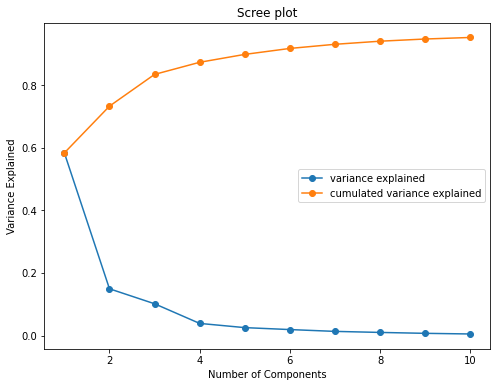

In [5]:
var = pca.explained_variance_ratio_
var_explained = np.zeros(10)
for i in range(10):
    var_explained[i] = sum(var[:i+1])
    
plt.figure(figsize = (8,6))
plt.plot(range(1, len(var_explained)+1), var, label="variance explained", marker="o")
plt.plot(range(1, len(var_explained)+1), var_explained, label="cumulated variance explained", marker="o")
plt.xlabel("Number of Components")
plt.ylabel("Variance Explained")
plt.title("Scree plot")
plt.legend()
plt.show()

From the scree plot, we know that the first 4 principal components have already captures most of the varaince in the stock data.

### Contributions of the features

Let's have a look at the 5 features (stocks) that contribute the most variance of the first principal component.

In [6]:
features = df_stock.columns[np.argsort(pca.components_[0])[-5:][::-1]]
print("Largest 5 contributors to the first principle componet:\n")
print(*features)

Largest 5 contributors to the first principle componet:

CTAS BDX AVGO LMT NOC


<a id="4"></a>

# <center>Example: PCA for Image Denoising</center>

Image denoising is one of the most popular applications of PCA. 

The projection step in PCA can remove the noise from the noisy image data. Therefore, we can first transform the noisy data to a lower dimensional space with PCA and then inverse transform the data back to obtain the denoised images.

### Import Data

In [7]:
X = np.genfromtxt('../input/fashionmnist/fashion-mnist_train.csv', delimiter=',')
Y = X[1:, 0]
X_train = X[21:, 1:]
X_test = X[1:21, 1:]

### Visualize the Original Image

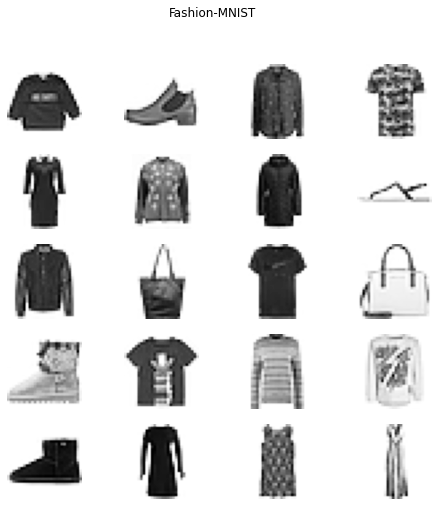

In [8]:
def plot_images(X, title):
    fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(8, 8))
    for img, ax in zip(X, axs.ravel()):
        ax.imshow(img.reshape((28, 28)), cmap="Greys")
        ax.axis("off")
    fig.suptitle(title, fontsize=12)

plot_images(X_test, 'Fashion-MNIST')

### Visualized the Noisy Image

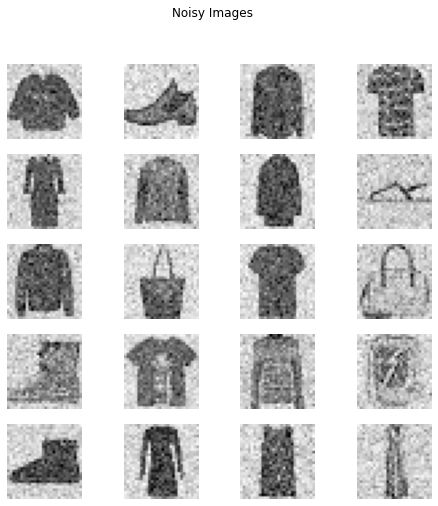

In [9]:
X_noisy = X_test + np.random.normal(loc = 0, scale = 40, size = X_test.shape)
plot_images(X_noisy, 'Noisy Images')

### PCA with 200 Principal Components

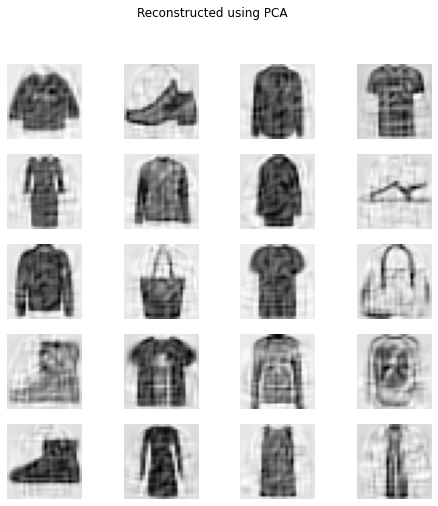

In [10]:
n = 200
pca = PCA(n_components=n)
pca.fit(X_train)

X_reconstructed = pca.inverse_transform(pca.transform(X_noisy))
plot_images(X_reconstructed, 'Reconstructed using PCA')

### Kernel PCA

I have reached my cumulative CPU usage... Try the kernel PCA yourself to see the results! I found that the KPCA works the best with the rbf kernel.

In [11]:
'''
for method in ["linear", "rbf", "poly", "cosine"]:
    kpca = KernelPCA(n_components=200, kernel=method, fit_inverse_transform=True)
    kpca.fit(X_train)
    X_reconstructed = kpca.inverse_transform(kpca.transform(X_noisy))
    plot_images(X_reconstructed, method)
'''

'\nfor method in ["linear", "rbf", "poly", "cosine"]:\n    kpca = KernelPCA(n_components=200, kernel=method, fit_inverse_transform=True)\n    kpca.fit(X_train)\n    X_reconstructed = kpca.inverse_transform(kpca.transform(X_noisy))\n    plot_images(X_reconstructed, method)\n'

### <center> Support me with an upvote if you find it useful! 👍 </center>